In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from wordcloud import WordCloud, STOPWORDS
import io as io
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv(r"C:\Users\khannaa3\Desktop\Data Incubator\Goodreads Dataset\GoodReads_100k_books.csv")

df.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


In [6]:
#Be aware of missing values
df.isnull().sum()

author              0
bookformat       3228
desc             6772
genre           10467
img              3045
isbn            14482
isbn13          11435
link                0
pages               0
rating              0
reviews             0
title               1
totalratings        0
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

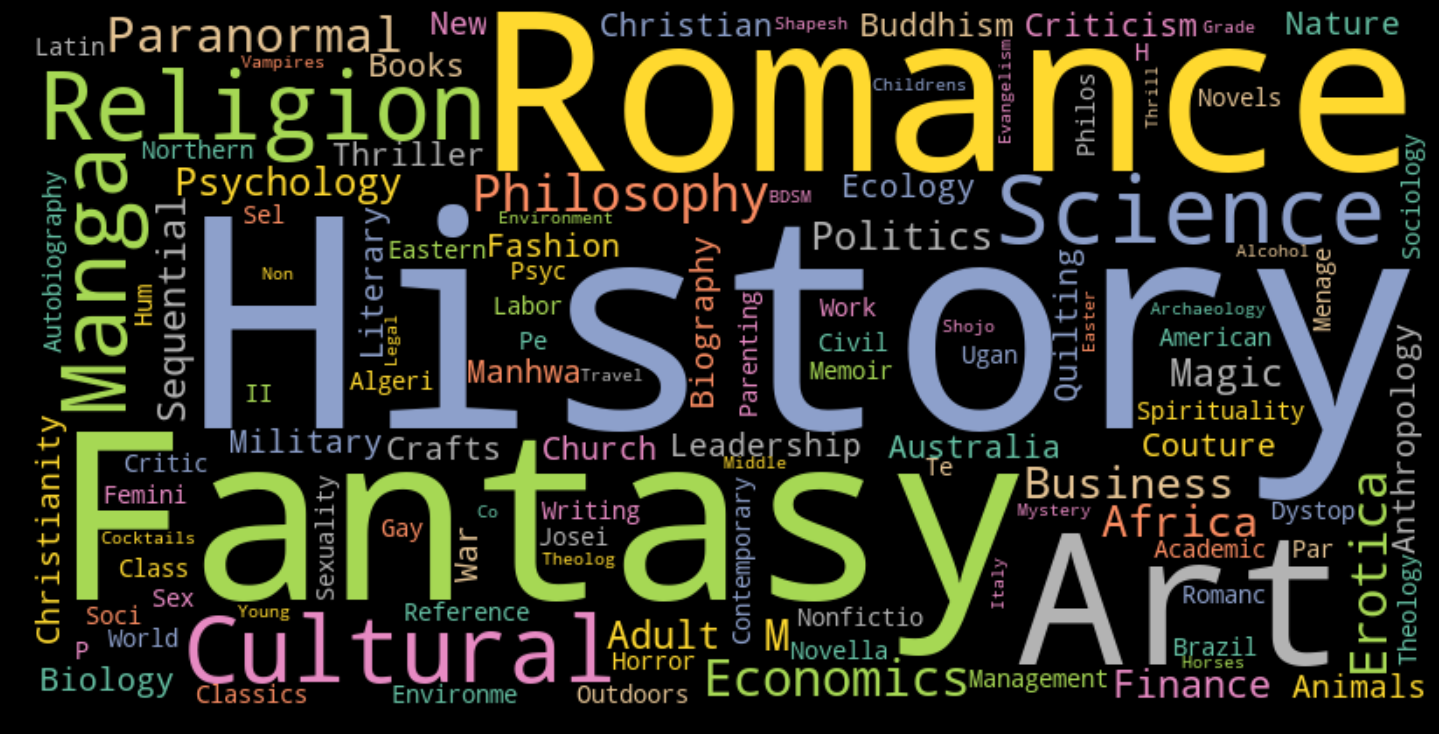

In [16]:
#FIRST WOULD LIKE TO GET A SENSE OF THE TYPES OF BOOKS PRESENT

#Remove Nans from genre column 
df.dropna(subset = ['genre'], inplace = True)

#Convert genre column to strings
genreStrings = str(df['genre'])

#Update Stopwords
STOPWORDS.update(['Fiction', 'Nonfiction', 'Historical', 'object', 'dtype', 'Name', 'Length', 'genre', 'Hi'])

#Plot wordcloud for genre
wordcloud = WordCloud(width=800, height=400, random_state = 2, colormap = 'Set2', collocations = False, stopwords = STOPWORDS).generate(genreStrings)
plt.figure( figsize=(20,10), facecolor ='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show

In [17]:
#NEXT WOULD LIKE TO SEE IF THE NUMBER OF PAGES IN A BOOK IS RELATED TO THE RATINGS OR THE AMOUNT OF REVIEWS 

#extract and format fields of interest
pages = df['pages']
pages = np.array(pages)
pages = pages.reshape(-1,1)

ratings = df['rating'].tolist()
ratings = np.array(ratings)
ratings = ratings.reshape(-1,1)

reviews = df['reviews'].tolist()
reviews = np.array(reviews)
reviews = reviews.reshape(-1,1)

In [18]:
#Only select books with less than 1000 pages, and find the mean rating and number of reviews for these books

reasonablePages = list(np.where(pages < 1000)[0])

X= [pages[i] for i in reasonablePages]
reasonablePageReviews = [reviews[i] for i in reasonablePages]
reasonablePageRatings = [ratings[i] for i in reasonablePages]

Coefficients: 
 [[0.73225899]]
Mean squared error: 2322672.55
Coefficient of determination: 0.01


Text(0, 0.5, 'Number of Reviews')

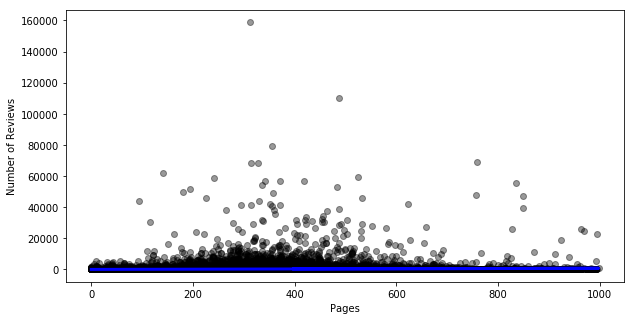

In [27]:
#Run a linear regression model to assess the relationship between pages and number of reviews

model = LinearRegression().fit(X,reasonablePageReviews)
rSquared = model.score(X,reasonablePageReviews)
pageReviewPredictions = model.predict(X)

print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(reasonablePageReviews, pageReviewPredictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(reasonablePageReviews, pageReviewPredictions))

plt.figure(figsize = (10,5))
plt.scatter(X, reasonablePageReviews, color = 'black', alpha = 0.4)
plt.plot(X, pageReviewPredictions, color = 'blue', linewidth = 3)
plt.xlabel('Pages')
plt.ylabel('Number of Reviews')


Coefficients: 
 [[0.0003314]]
Mean squared error: 0.15
Coefficient of determination: 0.02


Text(0, 0.5, 'Average Rating')

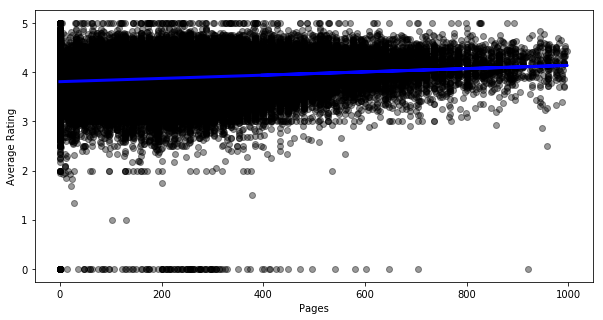

In [25]:
#Run a linear regression model to assess the relationship between pages and mean rating

model.fit(X, reasonablePageRatings)
model = LinearRegression().fit(X,reasonablePageRatings)
rSquared = model.score(X,reasonablePageRatings)
pageRatingsPredictions = model.predict(X)

print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(reasonablePageRatings, pageRatingsPredictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(reasonablePageRatings, pageRatingsPredictions))

plt.figure(figsize = (10,5))
plt.scatter(X, reasonablePageRatings, color = 'black', alpha = 0.4)
plt.plot(X, pageRatingsPredictions, color = 'blue', linewidth = 3)
plt.xlabel('Pages')
plt.ylabel('Average Rating')

In [23]:
## NEXT I WOULD LIKE TO SEE IF THERE IS A DIFFERENCE IN RATINGS BASED ON THE GENDER IDENTITY OF THE SUBJECT/AUTHOR

#Remove Nans from genre column 
df = df.dropna(subset = ['desc', 'rating'])
df.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
5,Jeffrey Pfeffer,Hardcover,Why is common sense so uncommon when it comes ...,"Business,Leadership,Romance,Historical Romance...",https://i.gr-assets.com/images/S/compressed.ph...,875848419,9.78E+12,https://goodreads.com/book/show/1001090.The_Hu...,368,3.73,7,The Human Equation: Building Profits by Puttin...,119


In [8]:
#Feature Extraction: Gender identity of the author or protagonist. Search the book summary for "her", "his", or " their " to get info on gender identity of subject  
 
herString = ' her '

herIndices = df['desc'].str.find(herString)
girlBooks = []
for i, x in enumerate(herIndices):
    if x >= 0:
        girlBooks.append(i)

hisString = ' his '
hisIndices = df['desc'].str.find(hisString)
boyBooks = []
for i, x in enumerate(hisIndices):
    if x >= 0:
        boyBooks.append(i)    
        
theirString = ' their '

theirIndices = df['desc'].str.find(theirString)
theirBooks = []
for i, x in enumerate(theirIndices):
    if x >= 0:
        theirBooks.append(i)

In [9]:
#Exclude intersections of these three lists. 

justGirlsBooks = [x for x in girlBooks if x not in boyBooks]
justBoysBooks = [x for x in boyBooks if x not in girlBooks]
justTheirBooks = [x for x in theirBooks if x not in boyBooks]
justTheirBooks = [x for x in justTheirBooks if x not in girlBooks] 

In [10]:
#Find means for all groups 

rateBoys = np.mean(df['rating'][justBoysBooks])
rateGirls = np.mean(df['rating'][justGirlsBooks])
rateThem = np.mean(df['rating'][justTheirBooks])
rateBoys, rateGirls, rateThem


(3.888809273422556, 3.8610512618296595, 3.8458987161198275)

In [11]:
#Find Medians for all groups

medianBoys = np.median(df['rating'][justBoysBooks])
medianGirls = np.median(df['rating'][justGirlsBooks])
medianThem = np.median(df['rating'][justTheirBooks])
medianBoys, medianGirls, medianThem


(3.93, 3.89, 3.93)

In [12]:
#Find Std for all groups

sdBoys = np.std(df['rating'][justBoysBooks])
sdGirls = np.std(df['rating'][justGirlsBooks])
sdThem = np.std(df['rating'][justTheirBooks])
sdBoys, sdGirls, sdThem

(0.4517493636120999, 0.37094268676912334, 0.634597237460838)

((array([-3.98931147, -3.77369397, -3.65573248, ...,  3.65573248,
          3.77369397,  3.98931147]), array([0., 0., 0., ..., 5., 5., 5.])),
 (0.395339030718509, 3.888809273422562, 0.8749686781311761))

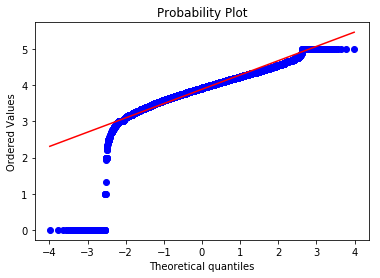

In [13]:
#Test for normality 
stats.probplot(df['rating'][justBoysBooks], dist = 'norm', plot = plt)
#DATA IS NOT NORMALLY DISTRIBUTED... SO USE kruskal-wallis test instead

In [14]:
stats.kruskal(df['rating'][justBoysBooks], df['rating'][justGirlsBooks], df['rating'][justTheirBooks])
#There is a statistically significant difference between the medians of these populations, 
#books with female author/protagonists have a lower median (0.04 points)

KruskalResult(statistic=114.92266297525136, pvalue=1.1088193906110984e-25)

<function matplotlib.pyplot.show(*args, **kw)>

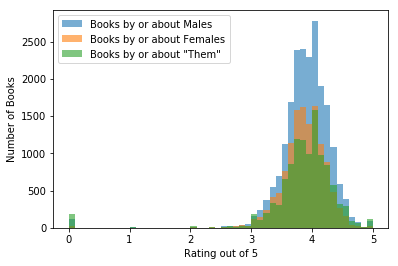

In [15]:
plt.hist(df['rating'][justBoysBooks], bins = 50, label = 'Books by or about Males', alpha = 0.6)
plt.hist(df['rating'][justGirlsBooks], bins = 50, label = 'Books by or about Females', alpha = 0.6)
plt.hist(df['rating'][justTheirBooks], bins = 50, label = 'Books by or about "Them"', alpha = 0.6)
plt.legend(loc='best')
plt.xlabel('Rating out of 5')
plt.ylabel('Number of Books')
plt.show